# Investor Share of New Resale Listings

In this notebook we are going to analyze how much of an impact investors have on the resale listing market. We are going to benchmark it against the overall country levels. 

**Note** This notebook will work with any of the 70k+ markets supported by the Parcl Labs API.

As a reminder, you can get your Parcl Labs API key [here](https://dashboard.parcllabs.com/signup) to follow along. 

In [38]:
import os
from datetime import datetime

import pandas as pd
import plotly.express as px
from parcllabs import ParclLabsClient

api_key = os.getenv('PARCL_LABS_API_KEY')

In [39]:
# initialize client
client = ParclLabsClient(api_key=api_key)

In [40]:
us = client.search_markets.retrieve(
    query='United States',
    as_dataframe=True
)
us

,parcl_id,country,geoid,state_fips_code,name,state_abbreviation,region,location_type
0,5826765,USA,None,None,United States Of America,None,None,COUNTRY


In [41]:
tampa = client.search_markets.retrieve(
    query='Tampa',
    location_type='CBSA',
    as_dataframe=True
)
tampa

,parcl_id,country,geoid,state_fips_code,name,state_abbreviation,region,location_type
0,2900417,USA,45300,None,"Tampa-St. Petersburg-Clearwater, Fl",None,None,CBSA


In [42]:
phoenix = client.search_markets.retrieve(
    query='Phoenix',
    location_type='CBSA',
    as_dataframe=True
)

phoenix

,parcl_id,country,geoid,state_fips_code,name,state_abbreviation,region,location_type
0,2900245,USA,38060,None,"Phoenix-Mesa-Chandler, Az",None,None,CBSA


In [43]:
atlanta = client.search_markets.retrieve(
    query='Atlanta',
    location_type='CBSA',
    as_dataframe=True
)

atlanta

,parcl_id,country,geoid,state_fips_code,name,state_abbreviation,region,location_type
0,2887280,USA,12060,None,"Atlanta-Sandy Springs-Alpharetta, Ga",None,None,CBSA


In [44]:
sf = client.search_markets.retrieve(
    query='San Francisco',
    location_type='CBSA',
    as_dataframe=True
)

sf

,parcl_id,country,geoid,state_fips_code,name,state_abbreviation,region,location_type
0,2900336,USA,41860,None,"San Francisco-Oakland-Berkeley, Ca",None,None,CBSA


In [45]:
miami = client.search_markets.retrieve(
    query='Miami',
    location_type='CBSA',
    as_dataframe=True,
)

miami = miami.loc[miami['name'].str.contains('Fl')]
miami

,parcl_id,country,geoid,state_fips_code,name,state_abbreviation,region,location_type
0,2900128,USA,33100,None,"Miami-Fort Lauderdale-Pompano Beach, Fl",None,None,CBSA


In [46]:
austin = client.search_markets.retrieve(
    query='Austin',
    location_type='CBSA',
    as_dataframe=True
)

austin = austin.loc[austin['name'].str.contains('Tx')]
austin

,parcl_id,country,geoid,state_fips_code,name,state_abbreviation,region,location_type
1,2887289,USA,12420,None,"Austin-Round Rock-Georgetown, Tx",None,None,CBSA


In [63]:
vegas = client.search_markets.retrieve(
    query='Las Vegas',
    location_type='CBSA',
    as_dataframe=True
)

vegas = vegas.loc[vegas['name'].str.contains('Nv')]
vegas

,parcl_id,country,geoid,state_fips_code,name,state_abbreviation,region,location_type
0,2900049,USA,29820,None,"Las Vegas-Henderson-Paradise, Nv",None,None,CBSA


In [89]:
east_north_central_cities = client.search_markets.retrieve(
    location_type='CITY',
    region='EAST_NORTH_CENTRAL',
    params={
        'limit': 1000
    },
    as_dataframe=True
)

east_north_central_cities.head()

,parcl_id,country,geoid,state_fips_code,name,state_abbreviation,region,location_type
0,5333443,USA,5500100,55,Abbotsford City,WI,EAST_NORTH_CENTRAL,CITY
1,5387920,USA,1700113,17,Abingdon City,IL,EAST_NORTH_CENTRAL,CITY
2,5403368,USA,5500275,55,Adams City,WI,EAST_NORTH_CENTRAL,CITY
3,5278505,USA,2600440,26,Adrian City,MI,EAST_NORTH_CENTRAL,CITY
4,5332624,USA,3901000,39,Akron City,OH,EAST_NORTH_CENTRAL,CITY


In [71]:
locations = pd.concat([us, phoenix, sf, atlanta, vegas])
locations

,parcl_id,country,geoid,state_fips_code,name,state_abbreviation,region,location_type
0,5826765,USA,None,None,United States Of America,None,None,COUNTRY
0,2900245,USA,38060,None,"Phoenix-Mesa-Chandler, Az",None,None,CBSA
0,2900336,USA,41860,None,"San Francisco-Oakland-Berkeley, Ca",None,None,CBSA
0,2887280,USA,12060,None,"Atlanta-Sandy Springs-Alpharetta, Ga",None,None,CBSA
0,2900049,USA,29820,None,"Las Vegas-Henderson-Paradise, Nv",None,None,CBSA


In [72]:
location_ids = locations['parcl_id'].tolist()
location_ids

[5826765, 2900245, 2900336, 2887280, 2900049]

In [73]:
# now lets get the investor share of listings for multiple markets

investor_listings = client.investor_metrics_new_listings_for_sale_rolling_counts.retrieve_many(
    parcl_ids=location_ids,
    params={
        'limit': 300
    },
    as_dataframe=True
)

investor_listings['pct_for_sale_market'] = investor_listings['pct_for_sale_market']/100
investor_listings.head(4)

,date,period,counts,pct_for_sale_market,parcl_id
0,2024-04-22,rolling_7_day,16665,0.1130,5826765
1,2024-04-22,rolling_30_day,64839,0.1107,5826765
2,2024-04-22,rolling_60_day,137411,0.1143,5826765
3,2024-04-22,rolling_90_day,203338,0.1178,5826765


In [79]:
# lets focus on 30 day period
investor_listings_30 = investor_listings.loc[investor_listings['period'] == 'rolling_60_day']
investor_listings_30

,date,period,counts,pct_for_sale_market,parcl_id
2,2024-04-22,rolling_60_day,137411,0.1143,5826765
2,2024-04-15,rolling_60_day,135620,0.1161,5826765
2,2024-04-08,rolling_60_day,135396,0.1190,5826765
2,2024-04-01,rolling_60_day,134799,0.1203,5826765
2,2024-03-25,rolling_60_day,135869,0.1216,5826765
...,...,...,...,...,...
2,2019-04-29,rolling_60_day,551,0.2683,2900049
2,2019-04-22,rolling_60_day,532,0.2665,2900049
2,2019-04-15,rolling_60_day,557,0.2782,2900049
2,2019-04-08,rolling_60_day,564,0.2746,2900049


In [80]:
# join against location name
locations.name.unique()

# cleanup names
name_map = {
    'United States Of America': 'USA', 
    'Tampa-St. Petersburg-Clearwater, Fl': 'Tampa',
    'Atlanta-Sandy Springs-Alpharetta, Ga': "Atlanta",
    'San Francisco-Oakland-Berkeley, Ca': "San Francisco",
    'Miami-Fort Lauderdale-Pompano Beach, Fl': "Miami",
    'Austin-Round Rock-Georgetown, Tx': "Austin",
    "Atlanta-Sandy Springs-Alpharetta, Ga": "Atlanta", 
    "Las Vegas-Henderson-Paradise, Nv": "Vegas"
}

locations['name'] = locations['name'].replace(name_map)

investor_listings_30 = pd.merge(investor_listings_30, locations[['parcl_id', 'name']], on='parcl_id')
investor_listings_30

,date,period,counts,pct_for_sale_market,parcl_id,name
0,2024-04-22,rolling_60_day,137411,0.1143,5826765,USA
1,2024-04-15,rolling_60_day,135620,0.1161,5826765,USA
2,2024-04-08,rolling_60_day,135396,0.1190,5826765,USA
3,2024-04-01,rolling_60_day,134799,0.1203,5826765,USA
4,2024-03-25,rolling_60_day,135869,0.1216,5826765,USA
...,...,...,...,...,...,...
1320,2019-04-29,rolling_60_day,551,0.2683,2900049,Vegas
1321,2019-04-22,rolling_60_day,532,0.2665,2900049,Vegas
1322,2019-04-15,rolling_60_day,557,0.2782,2900049,Vegas
1323,2019-04-08,rolling_60_day,564,0.2746,2900049,Vegas


In [81]:
labs_logo_lookup = {
    'blue': 'https://parcllabs-assets.s3.amazonaws.com/powered-by-parcllabs-api.png',
    'white': 'https://parcllabs-assets.s3.amazonaws.com/powered-by-parcllabs-api-logo-white.png'
}

# set charting constants
labs_logo_dict = dict(
        source=labs_logo_lookup['white'],
        xref="paper",
        yref="paper",
        x=0.5,  # Centering the logo below the title
        y=1.02,  # Adjust this value to position the logo just below the title
        sizex=0.15, 
        sizey=0.15,
        xanchor="center",
        yanchor="bottom"
)

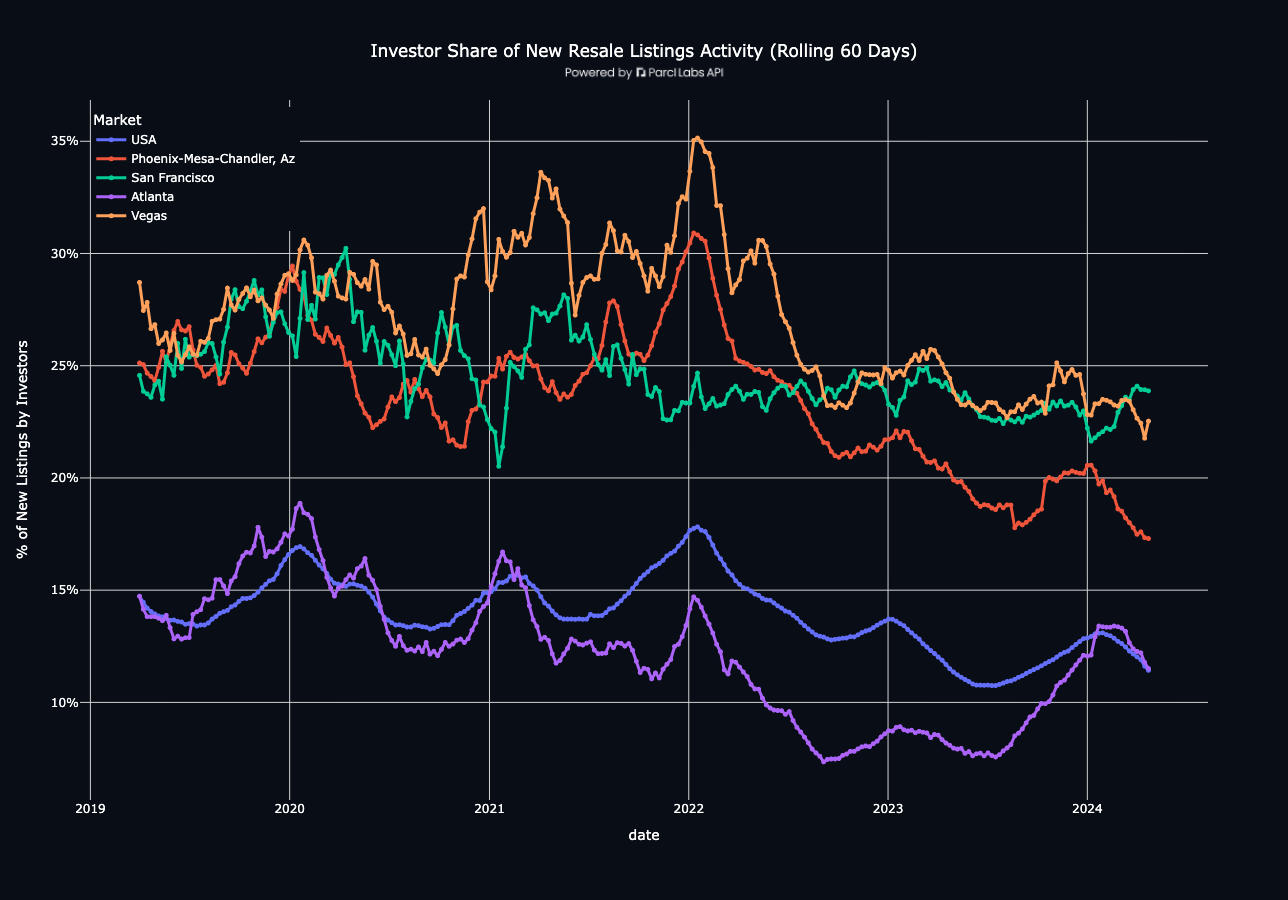

In [83]:
# create chart
fig = px.line(
    investor_listings_30,
    x='date',
    y='pct_for_sale_market',
    color='name',  # This creates separate lines for each period
    title=f'Investor Share of New Resale Listings Activity (Rolling 60 Days)',
    labels={'pct_for_sale_market': '% of New Listings by Investors'},
    line_shape='linear'  # 'spline' for smooth lines, if preferred
)

fig.add_layout_image(labs_logo_dict)

fig.update_layout(
    margin=dict(b=100),
    height=900,
    width=1600,
    legend=dict(
        x=0.01,
        y=0.99,
        traceorder="normal",
        xanchor='left',
        yanchor='top',
        title='Market'
    ),
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    plot_bgcolor='#080D16',
    paper_bgcolor='#080D16',
    font=dict(color='#FFFFFF'),
    xaxis_title='date' 
)

fig.update_yaxes(tickformat=".0%")

color_map = {
    'rolling_30_day': '#448CF2',
    'rolling_90_day': '#FFFFFF',
}

fig.update_traces(
    line=dict(width=3),
    mode='lines+markers',
    marker=dict(size=5)
)


for trace in fig.data:
    if trace.name in color_map:
        trace.line.color = color_map[trace.name]
        trace.marker.color = color_map[trace.name]

# Adding gridlines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

# Show the plot
fig.show() # Vegas, Atlanta, San Fran, USA